# Capstone Final Project - The Battle of Neighborhoods 

In [1]:
import pandas as pd
import numpy as np
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [2]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [3]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

## Load the data:
### The Population of Great Cleveland Area

In [4]:
file = 'Population.xls'
# df_popu = pd.read_excel(file, index_col='Geography')
df_popu = pd.read_excel(file, sep=r'\s*,\s*', header=0)
print(df_popu.shape)
df_popu.head()

(59, 12)


,Geography,census,Estimate Base,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Bay Village,15651,15651,15629,15544,15491,15484,15470,15428,15378,15343,15295
1,Beachwood,11953,11927,11909,11844,11814,11803,11785,11743,11703,11677,11658
2,Bedford,13074,13074,13052,12966,12909,12879,12831,12767,12704,12626,12561
3,Bedford Heights,10751,10757,10740,10692,10654,10729,10725,10680,10633,10579,10534
4,Bentleyville,864,864,863,864,859,859,857,855,854,853,851


In [5]:
df_popu = df_popu.drop(columns=['census','Estimate Base', 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017], axis=1)
print(df_popu.shape)
df_popu.head()

(59, 2)


,Geography,2018
0,Bay Village,15295
1,Beachwood,11658
2,Bedford,12561
3,Bedford Heights,10534
4,Bentleyville,851


In [6]:
df_popu.rename(columns={"Geography":"Neighborhood"}, inplace=True)
df_popu.sort_values(by=['Neighborhood'], ascending =True, inplace=True)
df_popu.reset_index(drop=True)
print(df_popu.shape)
df_popu.head()

(59, 2)


,Neighborhood,2018
0,Bay Village,15295
1,Beachwood,11658
2,Bedford,12561
3,Bedford Heights,10534
4,Bentleyville,851


In [7]:
df_popu[df_popu['Neighborhood'].str.match('Maple')]

,Neighborhood,2018
30,Maple Heights,22278


### The Average income of Great Cleveland Area 

In [8]:
file1 = 'Median_income.xls'
df_income = pd.read_excel(file1, sep=r'\s*,\s*', header=0)
print(df_income.shape)
df_income.head()

(247, 6)


,Rank,City,2012-2016 Median family income,2007-2011 Median family income,2012-2016 Median household income,2007-2011 Median household income
0,1,New Albany,214850,202243,191375,182321
1,2,Indian Hill,211795,"$250,000+",205221,243500
2,3,Pepper Pike,186765,171547,164471,151250
3,4,Powell,146442,151066,132917,142083
4,5,Dublin,144005,143619,125540,121431


In [9]:
df_income = df_income.drop(columns=['Rank','2007-2011 Median family income', '2007-2011 Median household income'], axis=1)
print(df_income.shape)
df_income.head()

(247, 3)


,City,2012-2016 Median family income,2012-2016 Median household income
0,New Albany,214850,191375
1,Indian Hill,211795,205221
2,Pepper Pike,186765,164471
3,Powell,146442,132917
4,Dublin,144005,125540


In [10]:
df_income.rename(columns={"City":"Neighborhood", "2012-2016 Median family income":"Family Income", "2012-2016 Median household income":"Household Income"}, inplace=True)
df_income.head()

,Neighborhood,Family Income,Household Income
0,New Albany,214850,191375
1,Indian Hill,211795,205221
2,Pepper Pike,186765,164471
3,Powell,146442,132917
4,Dublin,144005,125540


In [11]:
df_income.sort_values(by=['Neighborhood'], ascending = True, inplace=True)
df_income = df_income.reset_index(drop=True)
df_income.head()

,Neighborhood,Family Income,Household Income
0,Akron,45018,35240
1,Alliance,42092,32058
2,Amherst,76463,66731
3,Ashland,52598,39417
4,Ashtabula,35786,28865


In [12]:
df_income[df_income['Neighborhood'].str.match('Maple')]

,Neighborhood,Family Income,Household Income
119,Maple Heights,46442,37911


### The zip code of Great Cleveland Area

In [14]:
file2 = 'us-zip-code-latitude-and-longitude.xls'
df_clezip = pd.read_excel(file2, sep=r'\s*,\s*')
print(df_clezip.shape)
df_clezip.head()

(1498, 7)


,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag
0,43984,New Rumley,OH,40.296490,-81.102502,-5,1
1,43681,Toledo,OH,41.686778,-83.439430,-5,1
2,43733,Derwent,OH,39.923616,-81.542965,-5,1
3,43334,Marengo,OH,40.399648,-82.807830,-5,1
4,45841,Jenera,OH,40.881217,-83.731990,-5,1


In [15]:
df_clezip[df_clezip['City'].str.match('Maple')]

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag
370,45340,Maplewood,OH,40.372607,-84.05113,-5,1
695,44137,Maple Heights,OH,41.412653,-81.56067,-5,1


In [16]:
df_clezip = df_clezip.drop(columns=['Zip','State', 'Timezone', 'Daylight savings time flag'], axis=1)
df_clezip.rename(columns={"City":"Neighborhood"}, inplace=True)
df_clezip.head()

,Neighborhood,Latitude,Longitude
0,New Rumley,40.296490,-81.102502
1,Toledo,41.686778,-83.439430
2,Derwent,39.923616,-81.542965
3,Marengo,40.399648,-82.807830
4,Jenera,40.881217,-83.731990


In [17]:
df_clezip.sort_values(by=['Neighborhood'], ascending = True, inplace=True)
df_clezip.drop_duplicates(subset='Neighborhood',keep='first', inplace=True)
df_clezip.head()

,Neighborhood,Latitude,Longitude
679,Aberdeen,38.671655,-83.75693
835,Ada,40.774039,-83.81821
1393,Adamsville,40.090643,-81.86556
664,Addyston,39.137818,-84.70790
368,Adelphi,39.466041,-82.74570


In [18]:
df_clezip[df_clezip['Neighborhood'].str.match('Cleveland')]

,Neighborhood,Latitude,Longitude
686,Cleveland,41.505744,-81.672797


In [19]:
df_clezip = df_clezip.reset_index(drop=True)
print(df_clezip.shape)
df_clezip.head()

(1083, 3)


,Neighborhood,Latitude,Longitude
0,Aberdeen,38.671655,-83.75693
1,Ada,40.774039,-83.81821
2,Adamsville,40.090643,-81.86556
3,Addyston,39.137818,-84.70790
4,Adelphi,39.466041,-82.74570


### Cuyahoga County Open Data

In [73]:
file3 = 'zip_code_database.xls'
df_uszip = pd.read_excel(file3, sheet_name='data', sep=r'\s*,\s*', header=0)
df_uszip = df_uszip[['county', 'state','zip', 'primary_city', 'latitude', 'longitude']]
print(df_uszip.shape)
df_uszip.head()

(42632, 6)


,county,state,zip,primary_city,latitude,longitude
0,Suffolk County,NY,501.0,Holtsville,40.81,-73.04
1,Suffolk County,NY,544.0,Holtsville,40.81,-73.04
2,Adjuntas Municipio,PR,601.0,Adjuntas,18.16,-66.72
3,Aguada Municipio,PR,602.0,Aguada,18.38,-67.18
4,Aguadilla Municipio,PR,603.0,Aguadilla,18.43,-67.15


In [74]:
df_uszip['county'].dropna(inplace= True)
df_ohzip = df_uszip[df_uszip['state'].str.match('OH')]
df_ohzip.rename(columns={"primary_city":"Neighborhood", "latitude":"Latitude", "longitude":"Longitude"}, inplace=True)
df_ohzip.head()

/Users/mac/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,county,state,zip,Neighborhood,Latitude,Longitude
18504,Licking County,OH,43001.0,Alexandria,40.08,-82.61
18505,Franklin County,OH,43002.0,Amlin,40.07,-83.18
18506,Delaware County,OH,43003.0,Ashley,40.40,-82.95
18507,Franklin County,OH,43004.0,Blacklick,40.02,-82.80
18508,Knox County,OH,43005.0,Bladensburg,40.29,-82.28


In [75]:
df_ohzip.head()

,county,state,zip,Neighborhood,Latitude,Longitude
18504,Licking County,OH,43001.0,Alexandria,40.08,-82.61
18505,Franklin County,OH,43002.0,Amlin,40.07,-83.18
18506,Delaware County,OH,43003.0,Ashley,40.40,-82.95
18507,Franklin County,OH,43004.0,Blacklick,40.02,-82.80
18508,Knox County,OH,43005.0,Bladensburg,40.29,-82.28


In [82]:
df_ohzip = df_ohzip.reset_index(drop=True)
print(df_ohzip.shape)
df_ohzip.head(20)

(1446, 6)


,county,state,zip,Neighborhood,Latitude,Longitude
0,Brown County,OH,45101,Aberdeen,38.66,-83.76
1,Hardin County,OH,45810,Ada,40.76,-83.82
2,Muskingum County,OH,43802,Adamsville,40.06,-81.88
3,Hamilton County,OH,45001,Addyston,39.14,-84.71
4,Ross County,OH,43101,Adelphi,39.46,-82.75
5,Jefferson County,OH,43901,Adena,40.21,-80.87
6,Summit County,OH,44306,Akron,41.04,-81.48
7,Summit County,OH,44313,Akron,41.13,-81.57
8,Summit County,OH,44310,Akron,41.11,-81.49
9,Summit County,OH,44317,Akron,41.08,-81.52


### Merge the Data

In [ ]:
# df_clegeodata.drop(df_clegeodata.index, inplace=True)
# df_clegeodata.head(20)

In [20]:
df_clegeodata = pd.merge(df_income, df_popu, on='Neighborhood')
df_clegeodata = df_clegeodata.reset_index(drop=True)
print(df_clegeodata.shape)
df_clegeodata.head()

(39, 4)


,Neighborhood,Family Income,Household Income,2018
0,Bay Village,109673,93220,15295
1,Beachwood,115536,88287,11658
2,Bedford,55684,41285,12561
3,Bedford Heights,51591,37692,10534
4,Berea,79306,57896,18655


In [21]:
df_clegeodata = pd.merge(df_clegeodata, df_clezip, on='Neighborhood')
# df_clegeodata = df_clegeodata.reset_index(drop=True)
print(df_clegeodata.shape)
df_clegeodata.head(20)

(19, 6)


,Neighborhood,Family Income,Household Income,2018,Latitude,Longitude
0,Bay Village,109673,93220,15295,41.484193,-81.926580
1,Beachwood,115536,88287,11658,41.472881,-81.522090
2,Bedford,55684,41285,12561,41.389371,-81.527090
3,Berea,79306,57896,18655,41.369950,-81.862590
4,Brecksville,121974,98345,13632,41.307688,-81.618350
5,Broadview Heights,99286,77480,19202,41.321827,-81.676590
6,Cleveland,32488,26583,383793,41.505744,-81.672797
7,Euclid,49668,35949,46946,41.570344,-81.527260
8,Independence,105600,84900,7167,41.391753,-81.658160
9,Lakewood,70448,47145,50100,41.480881,-81.800360


### Visualize the data

In [69]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.3


In [67]:
df_plot1 = df_clegeodata[[2018]]
df_plot2 = df_plot[['Family Income', 'Household Income']]

,Family Income,Household Income
0,109673,93220
1,115536,88287
2,55684,41285
3,79306,57896
4,121974,98345


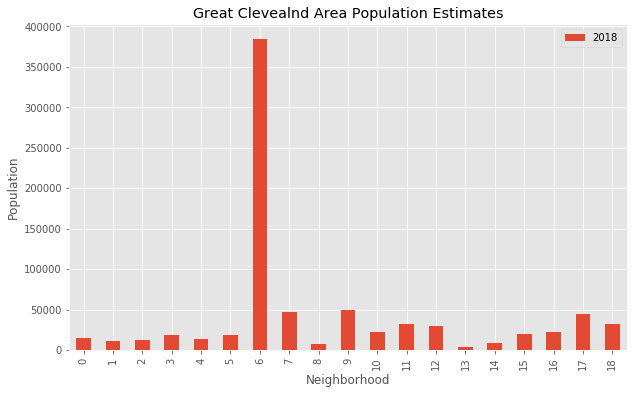

In [70]:
df_plot1.plot(kind='bar', figsize=(10, 6))
# n_bins = df_plot.shape[1]
# df_plot.hist()

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Great Clevealnd Area Population Estimates') # add title to the plot

plt.show()

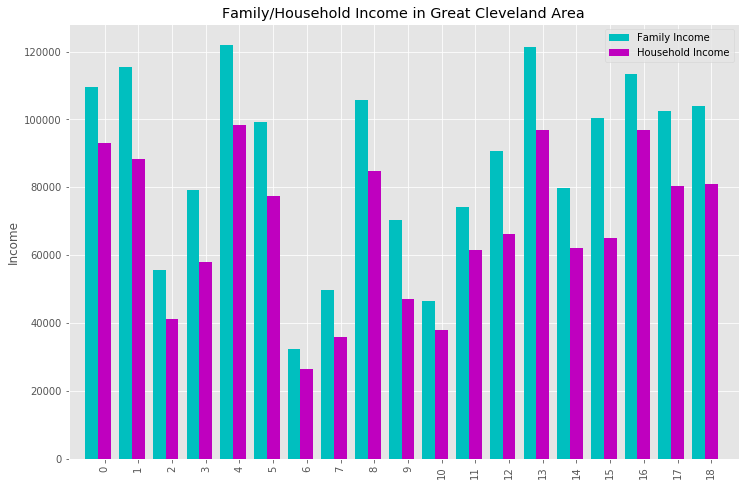

In [71]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
N = df_plot.shape[0]

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.38                     # the width of the bars

# the bars
rects1 = ax.bar(ind, df_plot2['Family Income'], width,
                color='c')

rects2 = ax.bar(ind+width, df_plot2['Household Income'], width,
                    color='m')

# axes and labels
ax.set_xlim(-width-0.3,len(ind)+width/2)
# ax.set_ylim(0,45)
ax.set_ylabel('Income')
ax.set_title('Family/Household Income in Great Cleveland Area')

xTickMarks = [list(df_plot2.index)[i] for i in range(0,N)]
ax.set_xticks(ind+width)

xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Family Income', 'Household Income') )

plt.show()

# Create a Map of Cleveland

In [22]:
address = 'Cleveland, OH'

geolocator = Nominatim(user_agent="cle_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cleveland is {}, {}.'.format(latitude, longitude))

# latitude = 41.505493 # 40.715337
# longitude = -81.681290 #-74.008848  41.685744	-81.6934

The geograpical coordinate of Cleveland is 41.5051613, -81.6934446.


In [23]:
# zip(41.685744, -81.6934)
df_clegeodata['Latitude']

0     41.484193
1     41.472881
2     41.389371
3     41.369950
4     41.307688
5     41.321827
6     41.505744
7     41.570344
8     41.391753
9     41.480881
10    41.412653
11    41.415097
12    41.313758
13    41.107804
14    41.373949
15    41.475297
16    41.388387
17    41.312752
18    41.454439
Name: Latitude, dtype: float64

In [25]:
map_cle = folium.Map(location=[latitude, longitude],zoom_start=10)

for lat,lng,neighborhood, borough in zip(df_clegeodata['Latitude'], df_clegeodata['Longitude'], df_clegeodata['Neighborhood'], df_clegeodata['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=10,
    popup=label,
    color='blue',
    fill=True,
    fill_color='red',
    fill_opacity=0.7,
    parse_html=False).add_to(map_cle)

map_cle

In [26]:
# cle_data = df_clegeodata[df_clegeodata['Neighborhood'] == 'Cleveland'].reset_index(drop=True)

cle_data = df_clegeodata
print(cle_data.shape)
cle_data.head()

(19, 6)


,Neighborhood,Family Income,Household Income,2018,Latitude,Longitude
0,Bay Village,109673,93220,15295,41.484193,-81.92658
1,Beachwood,115536,88287,11658,41.472881,-81.52209
2,Bedford,55684,41285,12561,41.389371,-81.52709
3,Berea,79306,57896,18655,41.369950,-81.86259
4,Brecksville,121974,98345,13632,41.307688,-81.61835


# Define Foursquare Credentials and Version


In [27]:
CLIENT_ID = 'XYXCT44DWBI212RRM4MLJXHMLJ1DWIF42GTQ1MMYJ3EMSPXU' # your Foursquare ID
CLIENT_SECRET = 'R1PUOAL2BYTJ305PYQ1XZL2ZEFKOVQ20F0YCYR5EWAP1VM1Y' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XYXCT44DWBI212RRM4MLJXHMLJ1DWIF42GTQ1MMYJ3EMSPXU
CLIENT_SECRET:R1PUOAL2BYTJ305PYQ1XZL2ZEFKOVQ20F0YCYR5EWAP1VM1Y


## Explore the first neighborhood in our dataframe.

In [ ]:
cle_data.loc[0, 'Neighborhood']

In [28]:
neighborhood_latitude = cle_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = cle_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = cle_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bay Village are 41.484193, -81.92658.


## Get the top 100 venues that are in Marble Hill within a radius of 500 meters.

In [29]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=XYXCT44DWBI212RRM4MLJXHMLJ1DWIF42GTQ1MMYJ3EMSPXU&client_secret=R1PUOAL2BYTJ305PYQ1XZL2ZEFKOVQ20F0YCYR5EWAP1VM1Y&v=20180605&ll=41.484193,-81.92658&radius=1000&limit=100'

In [30]:
results = requests.get(url).json()

In [31]:
cle_data = df_clegeodata.drop(columns=['Family Income', 'Household Income', 2018], axis=1).reset_index(drop=True)
cle_data.rename(columns={"City":"Neighborhood"}, inplace=True)
cle_data.head()

,Neighborhood,Latitude,Longitude
0,Bay Village,41.484193,-81.92658
1,Beachwood,41.472881,-81.52209
2,Bedford,41.389371,-81.52709
3,Berea,41.369950,-81.86259
4,Brecksville,41.307688,-81.61835


In [32]:
cle_data.loc[0,'Neighborhood']

'Bay Village'

In [33]:
neighborhood_latitude = cle_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = cle_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = cle_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bay Village are 41.484193, -81.92658.


In [34]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=XYXCT44DWBI212RRM4MLJXHMLJ1DWIF42GTQ1MMYJ3EMSPXU&client_secret=R1PUOAL2BYTJ305PYQ1XZL2ZEFKOVQ20F0YCYR5EWAP1VM1Y&v=20180605&ll=41.484193,-81.92658&radius=500&limit=100'

In [35]:
results = requests.get(url).json()
# print(results)

In [36]:
venues = results['response']['groups'][0]['items']
# venues
json_normalize(venues).head()

,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,venue.location.distance,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bfbef0d565f76b0492206db-0,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4bfbef0d565f76b0492206db,Lake Rd,US,Bay Village,United States,NaN,381,"[Lake Rd, Bay Village, OH 44140, United States]","[{'label': 'display', 'lat': 41.4876175525172,...",41.487618,-81.926853,44140,OH,Cahoon Memorial Park,0,[]
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b49eaf0f964a520f87526e3-1,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",4b49eaf0f964a520f87526e3,434 Dover Center Rd,US,Bay Village,United States,btw Normandy & Wolf Rds,391,[434 Dover Center Rd (btw Normandy & Wolf Rds)...,"[{'label': 'display', 'lat': 41.48368, 'lng': ...",41.483680,-81.921930,44140,OH,Heinen's Grocery Store,0,[]
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b49eb4ef964a520fd7526e3-2,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",4b49eb4ef964a520fd7526e3,27251 Wolf Rd,US,Bay Village,United States,NaN,353,"[27251 Wolf Rd, Bay Village, OH 44140, United ...","[{'label': 'display', 'lat': 41.4844, 'lng': -...",41.484400,-81.922353,44140,OH,Walgreens,0,[]
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b4e5244f964a52058e926e3-3,"[{'id': '4bf58dd8d48988d1c5941735', 'name': 'S...",4b4e5244f964a52058e926e3,27237 Wolf Rd,US,Bay Village,United States,NaN,394,"[27237 Wolf Rd, Bay Village, OH 44140, United ...","[{'label': 'display', 'lat': 41.48421869838541...",41.484219,-81.921850,44140,OH,SUBWAY,0,[]
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4e9a161b7ee539c8570d30ba-4,"[{'id': '4f04afc02fb6e1c99f3db0bc', 'name': 'M...",4e9a161b7ee539c8570d30ba,27309 Wolf Rd,US,Bay Village,United States,at Dover Plaza,321,"[27309 Wolf Rd (at Dover Plaza), Bay Village, ...","[{'label': 'display', 'lat': 41.48472424999942...",41.484724,-81.922792,44140,OH,Verizon Authorized Retailer – Victra,0,[]


In [37]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [38]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.head()
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Cahoon Memorial Park,Park,41.487618,-81.926853
1,Heinen's Grocery Store,Grocery Store,41.483680,-81.921930
2,Walgreens,Pharmacy,41.484400,-81.922353
3,SUBWAY,Sandwich Place,41.484219,-81.921850
4,Verizon Authorized Retailer – Victra,Mobile Phone Shop,41.484724,-81.922792


In [39]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

11 venues were returned by Foursquare.


## Explore Neighborhoods in Cleveland

## Create a function to repeat the same process to all the neighborhoods in Cleveland

In [40]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[] 
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### run the above function on each neighborhood and create a new dataframe called *manhattan_venues*.

In [41]:
cle_venues = getNearbyVenues(names=cle_data['Neighborhood'],
                                   latitudes=cle_data['Latitude'],
                                   longitudes=cle_data['Longitude']
                                  )


Bay Village
Beachwood
Bedford
Berea
Brecksville
Broadview Heights
Cleveland
Euclid
Independence
Lakewood
Maple Heights
North Olmsted
North Royalton
Oakwood
Olmsted Falls
Rocky River
Solon
Strongsville
Westlake


In [42]:
print(cle_venues.shape)
cle_venues.head()

(250, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Village,41.484193,-81.92658,Cahoon Memorial Park,41.487618,-81.926853,Park
1,Bay Village,41.484193,-81.92658,Heinen's Grocery Store,41.483680,-81.921930,Grocery Store
2,Bay Village,41.484193,-81.92658,Walgreens,41.484400,-81.922353,Pharmacy
3,Bay Village,41.484193,-81.92658,SUBWAY,41.484219,-81.921850,Sandwich Place
4,Bay Village,41.484193,-81.92658,Verizon Authorized Retailer – Victra,41.484724,-81.922792,Mobile Phone Shop


In [43]:
cle_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bay Village,11,11,11,11,11,11
Beachwood,2,2,2,2,2,2
Bedford,9,9,9,9,9,9
Berea,11,11,11,11,11,11
Cleveland,20,20,20,20,20,20
Euclid,5,5,5,5,5,5
Independence,4,4,4,4,4,4
Lakewood,41,41,41,41,41,41
Maple Heights,5,5,5,5,5,5


In [44]:
print('There are {} uniques categories.'.format(len(cle_venues['Venue Category'].unique())))

There are 104 uniques categories.


## Analyze Each Neighborhood

In [45]:
# one hot encoding
cle_onehot = pd.get_dummies(cle_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cle_onehot['Neighborhood'] = cle_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [cle_onehot.columns[-1]] + list(cle_onehot.columns[:-1])
print(fixed_columns)

cle_onehot = cle_onehot[fixed_columns]

cle_onehot.head()

['Neighborhood', 'Accessories Store', 'American Restaurant', 'BBQ Joint', 'Bakery', 'Bank', 'Bar', 'Baseball Field', 'Basketball Court', 'Big Box Store', 'Boutique', 'Bowling Alley', 'Breakfast Spot', 'Bridal Shop', 'Burger Joint', 'Burrito Place', 'Butcher', 'Café', 'Candy Store', 'Chinese Restaurant', 'Chocolate Shop', 'Clothing Store', 'Coffee Shop', 'Convenience Store', 'Cosmetics Shop', 'Cupcake Shop', 'Deli / Bodega', 'Department Store', 'Dim Sum Restaurant', 'Discount Store', 'Donut Shop', 'Electronics Store', 'Event Space', 'Fabric Shop', 'Falafel Restaurant', 'Farmers Market', 'Fast Food Restaurant', 'Financial or Legal Service', 'Football Stadium', 'Fried Chicken Joint', 'Frozen Yogurt Shop', 'Furniture / Home Store', 'Garden Center', 'Gas Station', 'Gastropub', 'Gift Shop', 'Golf Course', 'Grocery Store', 'Gym', 'Gym / Fitness Center', 'Hardware Store', 'Hobby Shop', 'Home Service', 'Hotel', 'Ice Cream Shop', 'Indian Restaurant', 'Intersection', 'Jewelry Store', 'Karaoke Bar

,Neighborhood,Accessories Store,American Restaurant,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Court,Big Box Store,...,Tex-Mex Restaurant,Thai Restaurant,Thrift / Vintage Store,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Bar,Wine Shop,Women's Store
0,Bay Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bay Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bay Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bay Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bay Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
cle_onehot.shape

(250, 105)

In [47]:
cle_grouped = cle_onehot.groupby('Neighborhood').mean().reset_index()
cle_grouped.head()

,Neighborhood,Accessories Store,American Restaurant,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Court,Big Box Store,...,Tex-Mex Restaurant,Thai Restaurant,Thrift / Vintage Store,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Bar,Wine Shop,Women's Store
0,Bay Village,0.0,0.00,0.0,0.0,0.090909,0.000000,0.090909,0.0,0.0,...,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,Beachwood,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,Bedford,0.0,0.00,0.0,0.0,0.000000,0.222222,0.000000,0.0,0.0,...,0.00,0.0,0.0,0.0,0.111111,0.000000,0.0,0.0,0.0,0.0
3,Berea,0.0,0.00,0.0,0.0,0.090909,0.000000,0.000000,0.0,0.0,...,0.00,0.0,0.0,0.0,0.000000,0.090909,0.0,0.0,0.0,0.0
4,Cleveland,0.0,0.05,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.05,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [48]:
cle_grouped.shape

(16, 105)

### Print each neighborhood along with the top 5 most common venues

In [49]:
num_top_venues = 5

for hood in cle_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = cle_grouped[cle_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bay Village----
               venue  freq
0     Sandwich Place  0.09
1        Pizza Place  0.09
2  Mobile Phone Shop  0.09
3               Park  0.09
4         Skate Park  0.09


----Beachwood----
               venue  freq
0       Intersection   0.5
1        Golf Course   0.5
2  Accessories Store   0.0
3        Music Store   0.0
4         Restaurant   0.0


----Bedford----
           venue  freq
0            Bar  0.22
1  Burrito Place  0.11
2    Supermarket  0.11
3   Home Service  0.11
4    Video Store  0.11


----Berea----
                  venue  freq
0        Sandwich Place  0.09
1     Mobile Phone Shop  0.09
2    Salon / Barbershop  0.09
3              Pharmacy  0.09
4  Fast Food Restaurant  0.09


----Cleveland----
            venue  freq
0   Grocery Store  0.10
1     Gas Station  0.10
2  Sandwich Place  0.05
3     Coffee Shop  0.05
4    Intersection  0.05


----Euclid----
                  venue  freq
0   American Restaurant   0.2
1        Sandwich Place   0.2
2            

## Let's put that into a *pandas* dataframe

In [50]:
#  Sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [51]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = cle_grouped['Neighborhood']

for ind in np.arange(cle_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cle_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Village,Gym / Fitness Center,Liquor Store,Park,Sandwich Place,Mobile Phone Shop,Skate Park,Pizza Place,Pharmacy,Grocery Store,Baseball Field
1,Beachwood,Intersection,Golf Course,Women's Store,Football Stadium,Dim Sum Restaurant,Discount Store,Donut Shop,Electronics Store,Event Space,Fabric Shop
2,Bedford,Bar,Home Service,Pharmacy,Video Store,Supermarket,Burrito Place,Bowling Alley,Garden Center,Falafel Restaurant,Fast Food Restaurant
3,Berea,Pet Store,Fast Food Restaurant,Pharmacy,Vietnamese Restaurant,Discount Store,Bank,Salon / Barbershop,Sandwich Place,Steakhouse,Liquor Store
4,Cleveland,Grocery Store,Gas Station,Bowling Alley,Shopping Plaza,Sandwich Place,Fast Food Restaurant,Dim Sum Restaurant,Coffee Shop,Convenience Store,Karaoke Bar


## 4. Cluster Neighborhoods

In [52]:
# set number of clusters
kclusters = 5

cle_grouped_clustering = cle_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 4, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [53]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

cle_merged = cle_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
cle_merged = cle_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

cle_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Village,41.484193,-81.92658,2.0,Gym / Fitness Center,Liquor Store,Park,Sandwich Place,Mobile Phone Shop,Skate Park,Pizza Place,Pharmacy,Grocery Store,Baseball Field
1,Beachwood,41.472881,-81.52209,4.0,Intersection,Golf Course,Women's Store,Football Stadium,Dim Sum Restaurant,Discount Store,Donut Shop,Electronics Store,Event Space,Fabric Shop
2,Bedford,41.389371,-81.52709,2.0,Bar,Home Service,Pharmacy,Video Store,Supermarket,Burrito Place,Bowling Alley,Garden Center,Falafel Restaurant,Fast Food Restaurant
3,Berea,41.369950,-81.86259,2.0,Pet Store,Fast Food Restaurant,Pharmacy,Vietnamese Restaurant,Discount Store,Bank,Salon / Barbershop,Sandwich Place,Steakhouse,Liquor Store
4,Brecksville,41.307688,-81.61835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
cle_merged['Cluster Labels']
cle_merged['Cluster Labels'].dropna(inplace= True)
cle_merged['Cluster Labels']

0     2.0
1     4.0
2     2.0
3     2.0
6     2.0
7     2.0
8     2.0
9     2.0
10    2.0
11    2.0
12    0.0
14    1.0
15    2.0
16    2.0
17    2.0
18    3.0
Name: Cluster Labels, dtype: float64

In [55]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cle_merged['Latitude'], cle_merged['Longitude'], cle_merged['Neighborhood'], cle_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=12,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

In [83]:
cle_merged.head(10)

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Village,41.484193,-81.926580,2.0,Gym / Fitness Center,Liquor Store,Park,Sandwich Place,Mobile Phone Shop,Skate Park,Pizza Place,Pharmacy,Grocery Store,Baseball Field
1,Beachwood,41.472881,-81.522090,4.0,Intersection,Golf Course,Women's Store,Football Stadium,Dim Sum Restaurant,Discount Store,Donut Shop,Electronics Store,Event Space,Fabric Shop
2,Bedford,41.389371,-81.527090,2.0,Bar,Home Service,Pharmacy,Video Store,Supermarket,Burrito Place,Bowling Alley,Garden Center,Falafel Restaurant,Fast Food Restaurant
3,Berea,41.369950,-81.862590,2.0,Pet Store,Fast Food Restaurant,Pharmacy,Vietnamese Restaurant,Discount Store,Bank,Salon / Barbershop,Sandwich Place,Steakhouse,Liquor Store
6,Cleveland,41.505744,-81.672797,2.0,Grocery Store,Gas Station,Bowling Alley,Shopping Plaza,Sandwich Place,Fast Food Restaurant,Dim Sum Restaurant,Coffee Shop,Convenience Store,Karaoke Bar
7,Euclid,41.570344,-81.527260,2.0,American Restaurant,Discount Store,Sandwich Place,Bar,Fast Food Restaurant,Women's Store,Football Stadium,Donut Shop,Electronics Store,Event Space
8,Independence,41.391753,-81.658160,2.0,Salad Place,Financial or Legal Service,Hotel,Mobile Phone Shop,Dim Sum Restaurant,Discount Store,Donut Shop,Electronics Store,Event Space,Fabric Shop
9,Lakewood,41.480881,-81.800360,2.0,Sandwich Place,Mobile Phone Shop,Salon / Barbershop,Bakery,Bank,Candy Store,Bar,Café,Pharmacy,Coffee Shop
10,Maple Heights,41.412653,-81.560670,2.0,Hardware Store,Sandwich Place,Discount Store,Basketball Court,Farmers Market,Football Stadium,Dim Sum Restaurant,Donut Shop,Electronics Store,Event Space
11,North Olmsted,41.415097,-81.914360,2.0,Furniture / Home Store,Mobile Phone Shop,American Restaurant,Bank,Shoe Store,Cosmetics Shop,Indian Restaurant,Electronics Store,Pharmacy,Pet Store


In [57]:
nan_value = float("NaN")
cle_merged.replace("nan", nan_value, inplace=True)
cle_merged.dropna(subset = ["Cluster Labels"], inplace=True)
# cle_merged.head()

#### Cluster 1

In [58]:
cle_merged.loc[cle_merged['Cluster Labels'] == 0, cle_merged.columns[[1] + list(range(5, cle_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,41.313758,Pool,Women's Store,Financial or Legal Service,Dim Sum Restaurant,Discount Store,Donut Shop,Electronics Store,Event Space,Fabric Shop


### Cluster 2

In [59]:
cle_merged.loc[cle_merged['Cluster Labels'] == 1, cle_merged.columns[[1] + list(range(5, cle_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,41.373949,Women's Store,Football Stadium,Dim Sum Restaurant,Discount Store,Donut Shop,Electronics Store,Event Space,Fabric Shop,Falafel Restaurant


### Cluster 3

In [60]:
cle_merged.loc[cle_merged['Cluster Labels'] == 2, cle_merged.columns[[1] + list(range(5, cle_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,41.484193,Liquor Store,Park,Sandwich Place,Mobile Phone Shop,Skate Park,Pizza Place,Pharmacy,Grocery Store,Baseball Field
2,41.389371,Home Service,Pharmacy,Video Store,Supermarket,Burrito Place,Bowling Alley,Garden Center,Falafel Restaurant,Fast Food Restaurant
3,41.369950,Fast Food Restaurant,Pharmacy,Vietnamese Restaurant,Discount Store,Bank,Salon / Barbershop,Sandwich Place,Steakhouse,Liquor Store
6,41.505744,Gas Station,Bowling Alley,Shopping Plaza,Sandwich Place,Fast Food Restaurant,Dim Sum Restaurant,Coffee Shop,Convenience Store,Karaoke Bar
7,41.570344,Discount Store,Sandwich Place,Bar,Fast Food Restaurant,Women's Store,Football Stadium,Donut Shop,Electronics Store,Event Space
8,41.391753,Financial or Legal Service,Hotel,Mobile Phone Shop,Dim Sum Restaurant,Discount Store,Donut Shop,Electronics Store,Event Space,Fabric Shop
9,41.480881,Mobile Phone Shop,Salon / Barbershop,Bakery,Bank,Candy Store,Bar,Café,Pharmacy,Coffee Shop
10,41.412653,Sandwich Place,Discount Store,Basketball Court,Farmers Market,Football Stadium,Dim Sum Restaurant,Donut Shop,Electronics Store,Event Space
11,41.415097,Mobile Phone Shop,American Restaurant,Bank,Shoe Store,Cosmetics Shop,Indian Restaurant,Electronics Store,Pharmacy,Pet Store
15,41.475297,Football Stadium,Salon / Barbershop,Bakery,Massage Studio,Dim Sum Restaurant,Discount Store,Donut Shop,Electronics Store,Event Space


### Cluster 4

In [61]:
cle_merged.loc[cle_merged['Cluster Labels'] == 3, cle_merged.columns[[1] + list(range(5, cle_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,41.454439,Wine Shop,Dim Sum Restaurant,Discount Store,Donut Shop,Electronics Store,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market


### Cluster 5

In [62]:
cle_merged.loc[cle_merged['Cluster Labels'] == 4, cle_merged.columns[[1] + list(range(5, cle_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,41.472881,Golf Course,Women's Store,Football Stadium,Dim Sum Restaurant,Discount Store,Donut Shop,Electronics Store,Event Space,Fabric Shop
